In [1]:
from krasulina import KrasulinaPCA, get_random_orthogonal_initializer, get_eigenvecs
from vr_pca import VRPCA, get_default_learning_rate
from oja import Oja
import numpy as np
import math

/Users/tcheng/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/tcheng/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
%matplotlib inline

## MNIST

In [3]:
from mnist import MNIST
from sklearn.decomposition import PCA

mndata = MNIST('python-mnist/data')
images, labels = mndata.load_training()

In [4]:
import numpy as np

images_array = np.array([np.array(data_pt) for data_pt in images])
n_samples, n_features = images_array.shape
print(n_samples, n_features)

60000 784


In [5]:
images_centered = images_array - images_array.mean(axis=0)

In [6]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=0.8, svd_solver='full')

In [7]:
pca.fit(images_centered)

pca.n_components_

44

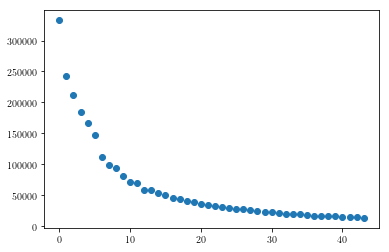

In [8]:
plt.plot(list(range(pca.n_components_)), pca.explained_variance_, 'o')

In [9]:
print('Number of used components', pca.n_components_)
print('Largest eigenvalue: {}, smallest eigenvalue {}'.format(pca.explained_variance_[0], pca.explained_variance_[-1]))

Number of used components 44
Largest eigenvalue: 332724.66744656884, smallest eigenvalue 13652.82314029589


In [10]:
k = 44
d = n_features
_init_weights = get_random_orthogonal_initializer(k, d, seed=0)

n_train = len(images_centered)

n_runs = 5

In [11]:
import random
#random.seed(0)


algo_list = []
vr_algo_list = []
oja_decay_list = []
oja_const_list = []
#random.shuffle(images_centered.copy())

In [12]:
for i in range(n_runs):
    images_centered_2 = images_centered.copy()
    random.seed(i)
    random.shuffle(images_centered_2)
    mb_size = 1
    T = 4*int(n_train / float(mb_size))
    #lr = (None, 5*1e-09) 
    lr = (None, 1e-8)
    #lr = (None, 1e-07) 
    log_freq = int(T / 10.0)
    algo = KrasulinaPCA(_init_weights, images_centered_2, groundtruth=pca.components_, 
                    learning_rate=lr, mini_batch_size=1, max_iter=T, log_freq=log_freq)
    algo._train()
    algo_list.append(algo)

The initial mse: 194491802709.52182
The initial loss: 41.46361612121025
The loss at the 0-th epoch 24000-th iteration is 3.783405607749927
The loss at the 0-th epoch 48000-th iteration is 1.932266604303551
Finished training 1-th epoch with total 60000 iterations
The current learning rate is 1e-08
The loss at the 1-th epoch 72000-th iteration is 1.6166341628205116
The loss at the 1-th epoch 96000-th iteration is 1.251420046767695
Finished training 2-th epoch with total 120000 iterations
The current learning rate is 1e-08
The loss at the 2-th epoch 120000-th iteration is 1.0374968041920338
The loss at the 2-th epoch 144000-th iteration is 1.0542727297635
The loss at the 2-th epoch 168000-th iteration is 0.8962875920269934
Finished training 3-th epoch with total 180000 iterations
The current learning rate is 1e-08
The loss at the 3-th epoch 192000-th iteration is 0.9647719451620491
The loss at the 3-th epoch 216000-th iteration is 0.7787830379214382
Finished training 4-th epoch with total

In [13]:
for i in range(n_runs):
    images_centered_2 = images_centered.copy()
    random.seed(i)
    random.shuffle(images_centered_2)
    n_epoch = 2
    #lr = get_default_learning_rate(vgg_centered)
    lr = 1e-08  
    vr_algo = VRPCA(_init_weights, images_centered_2, pca.components_, lr, n_train, 
                n_epoch, log_freq=n_epoch*int(n_train/10.0))
    vr_algo._train()
    vr_algo_list.append(vr_algo)

The loss at the 1-th epoch 0-th iteration is 41.46094310182359
The loss at the 1-th epoch 12000-th iteration is 9.964176205754569
The loss at the 1-th epoch 24000-th iteration is 3.638255274357978
The loss at the 1-th epoch 36000-th iteration is 2.045724847887061
The loss at the 1-th epoch 48000-th iteration is 1.4398882252965697
The loss at the 3-th epoch is 1.4398882252965697
The loss at the 3-th epoch 0-th iteration is 1.1387596864380511
The loss at the 3-th epoch 12000-th iteration is 0.895188231680941
The loss at the 3-th epoch 24000-th iteration is 0.7922832697223604
The loss at the 3-th epoch 36000-th iteration is 0.7107801826179785
The loss at the 3-th epoch 48000-th iteration is 0.6465624092688962
The loss at the 5-th epoch is 0.6465624092688962
The loss at the 1-th epoch 0-th iteration is 41.46094336474883
The loss at the 1-th epoch 12000-th iteration is 9.973508157436275
The loss at the 1-th epoch 24000-th iteration is 3.654930318105599
The loss at the 1-th epoch 36000-th it

In [14]:
# mb_size = 1
# T = 4*int(n_train / float(mb_size))

# #lr = (None, 1e-09*5) 
# #lr = (1e-09*5, 100)
# lr = (1e-06, 1e-09*5) 
# log_freq = int(T / 10.0)
# oja_algo = Oja(_init_weights, vgg_centered, groundtruth=pca.components_, 
#                     learning_rate=lr, mini_batch_size=1, max_iter=T, log_freq=log_freq)

In [16]:
vr_algo_default_list = []
for i in range(n_runs):
    images_centered_2 = images_centered.copy()
    random.seed(i)
    random.shuffle(images_centered_2)
    n_epoch = 2
    lr = get_default_learning_rate(images_centered)
    #lr = 1e-08  
    vr_algo_default = VRPCA(_init_weights, images_centered_2, pca.components_, lr, n_train, 
                n_epoch, log_freq=n_epoch*int(n_train/10.0))
    vr_algo_default._train()
    vr_algo_default_list.append(vr_algo_default)

The loss at the 1-th epoch 0-th iteration is 13.818394901709699
The loss at the 1-th epoch 12000-th iteration is 9.98817687266705
The loss at the 1-th epoch 24000-th iteration is 9.954352063682293
The loss at the 1-th epoch 36000-th iteration is 10.07132486106147
The loss at the 1-th epoch 48000-th iteration is 10.028968538683504
The loss at the 3-th epoch is 10.028968538683504
The loss at the 3-th epoch 0-th iteration is 5.174374905308621
The loss at the 3-th epoch 12000-th iteration is 5.007792364346804
The loss at the 3-th epoch 24000-th iteration is 5.241738723889813
The loss at the 3-th epoch 36000-th iteration is 5.131119689509754
The loss at the 3-th epoch 48000-th iteration is 5.151323062483044
The loss at the 5-th epoch is 5.151323062483044
The loss at the 1-th epoch 0-th iteration is 13.818559096845673
The loss at the 1-th epoch 12000-th iteration is 9.996176050848883
The loss at the 1-th epoch 24000-th iteration is 10.078167029938825
The loss at the 1-th epoch 36000-th itera

In [ ]:
# for _ in range(n_runs):
#     mb_size = 1
#     T = 1*int(n_train / float(mb_size))
#     lr = (1e-4, 1)
#     log_freq = int(T / 10.0)
#     oja_algo = Oja(_init_weights, images_centered, groundtruth=pca.components_, 
#                     learning_rate=lr, mini_batch_size=1, max_iter=T, log_freq=log_freq)
#     oja_algo._train()
#     oja_decay_list.append(oja_algo)
    

In [ ]:
# for _ in range(n_runs):
#     mb_size = 1
#     T = 4*int(n_train / float(mb_size))
#     lr = (None, 1e-09*5)
#     #lr = (None, 1e-08)
#     log_freq = int(T / 10.0)
#     oja_algo_ = Oja(_init_weights, images_centered, groundtruth=pca.components_, 
#                     learning_rate=lr, mini_batch_size=1, max_iter=T, log_freq=log_freq)
#     oja_algo_._train()
#     oja_const_list.append(oja_algo_)
    

In [31]:
eps = 1e-10

log_algo_list = []
for algo in algo_list:
    log_algo_list.append([math.log(y+eps) for y in algo._groundtruth_eval_log])

algo_mean, algo_var = np.mean(np.array(log_algo_list), axis=0), np.var(np.array(log_algo_list), axis=0)

print(algo_var)
##
log_vr_algo_list = []
for vr_algo in vr_algo_list:
    log_vr_algo_list.append([math.log(y+eps) for y in vr_algo._train_log])

vr_algo_mean, vr_algo_var = np.mean(np.array(log_vr_algo_list), axis=0), np.var(np.array(log_vr_algo_list), axis=0)


##
log_vr_algo_df_list = []
for vr_algo in vr_algo_default_list:
    log_vr_algo_df_list.append([math.log(y+eps) for y in vr_algo._train_log])

vr_algo_df_mean, vr_algo_df_var = np.mean(np.array(log_vr_algo_df_list), axis=0), np.var(np.array(log_vr_algo_df_list), axis=0)



##
# log_oja_decay_list = []
# for oja_decay in oja_decay_list:
#     log_oja_decay_list.append([math.log(y+eps) for y in oja_decay._groundtruth_eval_log])

# oja_decay_mean, oja_decay_var = np.mean(np.array(log_oja_decay_list), axis=0), np.var(np.array(log_oja_decay_list), axis=0)


##
# log_oja_const_list = []
# for oja_const in oja_const_list:
#     log_oja_const_list.append([math.log(y+eps) for y in oja_const._groundtruth_eval_log])

# oja_const_mean, oja_const_var = np.mean(np.array(log_oja_const_list), axis=0), np.var(np.array(log_oja_const_list),axis=0)

[0.00000000e+00 1.31672730e-04 1.37674275e-03 6.24929542e-03
 1.18984650e-02 2.92491428e-02 3.35670740e-02 5.86052297e-02
 5.19061598e-02 9.44798666e-02 1.39210058e-01]


In [18]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
%matplotlib inline

In [39]:
frac_epoch = [0]+[0.4*t for t in range(1, 11)]
#vrpca_frac_epoch = [1 + t for t in frac_epoch]
vrpca_frac_epoch = [0]+[1.2, 1.4, 1.6, 1.8, 3, 3.2, 3.4, 3.6, 3.8]

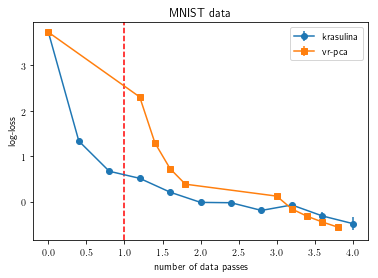

In [45]:
plt.errorbar(frac_epoch, algo_mean, algo_var, marker='o', label='krasulina')
#plt.plot(frac_epoch, oja_decay_mean[1:], '--*', label=r'oja')
#plt.plot(frac_epoch, oja_const_mean[1:], '--s', label=r'oja-$\eta$: constant')
plt.errorbar(vrpca_frac_epoch, vr_algo_mean, vr_algo_var, marker='s', label='vr-pca')
#plt.errorbar(vrpca_frac_epoch, vr_algo_df_mean, vr_algo_df_var, label='vr-pca: default $\eta$')
plt.axvline(x=1, color='r', linestyle='--')
plt.legend()
plt.xlabel('number of data passes')
plt.ylabel('log-loss')
plt.title('MNIST data')
plt.savefig('mnist_4_passes-cut.png')